In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#for statistical analysis
import scipy.stats as stats
from scipy.stats import mannwhitneyu
import seaborn as sns
import warnings

## Read in the data

In [74]:
stores_combined = pd.read_csv("C:\\Users\\41798\\Desktop\\CIP\\cip-gemuese\\stores_combined_all.csv")
stores_combined.head()

,name,price,amount,price_per_amount,country_origin,additional_info,category,time,BIO,price per 100g/pice,...,Weight_unit,Discount_start_date,Discount_end_date,Discount_start_day,Discount_end_day,Discount_duration,Discount_exist,unit,product_url,product_simple
0,"Schweizer Rockit Äpfel 400g, SUISSE GARANTIE",1.99,400 g,0.50/100g,Ursprungsland: Schweiz,Zusatzinformationen:\nBei dem Artikelbild hand...,obst/äpfel-&-birnen,2024-11-01,False,0.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Apfel
1,"Schweizer Äpfel Foodtainer 800g, SUISSE GARANTIE",2.29,800 g,2.86/1kg,Ursprungsland: Schweiz,Zusatzinformationen:\nBei dem Artikelbild hand...,obst/äpfel-&-birnen,2024-11-01,False,0.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Apfel
2,"RETOUR AUX SOURCES BIO Schweizer Äpfel 750g, S...",4.29,750 g,5.72/100g,Ursprungsland: Schweiz,Zusatzinformationen:\nBei dem Artikelbild hand...,obst/äpfel-&-birnen,2024-11-01,True,5.720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Apfel
3,"RETOUR AUX SOURCES BIO Schweizer Birnen 500g, ...",2.99,500 g,0.60/100g,Ursprungsland: Schweiz,Zusatzinformationen:\nBei dem Artikelbild hand...,obst/äpfel-&-birnen,2024-11-01,True,0.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Birne
4,"Schweizer Birnen 1kg, SUISSE GARANTIE",1.99,1 kg,1.99/1kg,Ursprungsland: Schweiz,Zusatzinformationen:\nBei dem Artikelbild hand...,obst/äpfel-&-birnen,2024-11-01,False,0.199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Birne


## filter for just one common date and remove rows with NAs in price per 100g/pice

In [ ]:
## check for a date which is in aldi and lidl take only this date to filter the dataset

In [75]:
aldi_dates = set(stores_combined[stores_combined["retailer"] == "aldi"]["time"])
lidl_dates = set(stores_combined[stores_combined["retailer"] == "lidl"]["time"])

common_dates = aldi_dates.intersection(lidl_dates)

one_common_date = next(iter(common_dates))

aldi_lidl_filtered = stores_combined[(stores_combined["retailer"].isin(["aldi","lidl"])) & (stores_combined["time"] == one_common_date)]

#filter out the na's in
migros_filterd = stores_combined[(stores_combined["retailer"] == "migros") &
                                 (stores_combined["price per 100g/pice"].notna())]

filtered_df = pd.concat([aldi_lidl_filtered,migros_filterd])

filtered_df = filtered_df.reset_index(drop = True)


The datasets for Aldi and Lidl include timestamps, as the data was collected over several days. Consequently,
the same product may appear multiple times on different dates.
To ensure consistency, the dataset was filtered to include only entries from a single common date shared by both retailers.

For Migros, the dataset does not include timestamps.
Instead, products with missing values in the column price per 100g/piece were removed to ensure
only valid entries with pricing information are retained for further analysis.

# descriptive analysis

In [26]:
# comparing statistical properties regarding the price
selected_columns = ['price', 'price per 100g/pice', 'retailer']
desc_stats = round(filtered_df[selected_columns].groupby('retailer').describe(),2)
desc_stats


price                                             \
          count  mean   std   min   25%   50%   75%    max   
retailer                                                     
aldi      129.0  2.23  1.04  0.21  1.49  1.99  2.79   6.49   
lidl      158.0  2.41  1.25  0.39  1.59  2.29  2.98   7.90   
migros    162.0  4.50  2.48  0.90  2.71  3.92  5.90  11.95   

         price per 100g/pice                                             
                       count  mean   std   min   25%   50%   75%    max  
retailer                                                                 
aldi                   129.0  0.90  0.83  0.11  0.36  0.60  1.25   5.72  
lidl                   158.0  0.69  0.75  0.11  0.27  0.44  0.79   4.99  
migros                 162.0  1.36  1.54  0.11  0.60  0.94  1.58  14.75

The overall prices for products across aldi, lidl, and migros highlighting differences in average prices, variablity and ranges.Migros stands out with the highest average pice (4.50) and the widest price range, while aldi has the lowest average price (2.23) and the most consistent pricing.Lidl shows moderate pricing with a slightly higher average than aldi but lower than migros.
The price per 100g/pice showing similar trends. Migros again has the highest average price (1.36) and variability, while Lidl now has the lowest average price (0.69) with consistent pricing and aldi lies between.

# statistical analysis

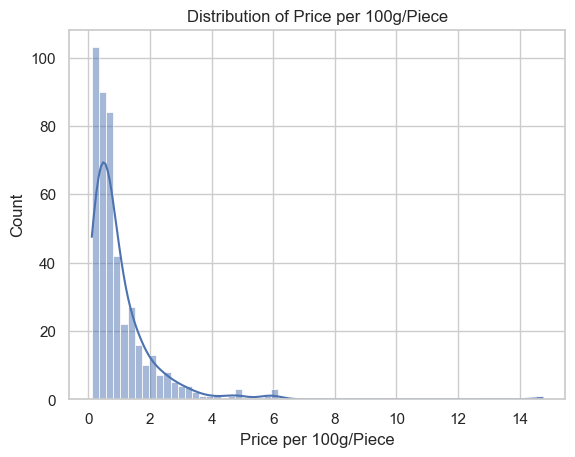

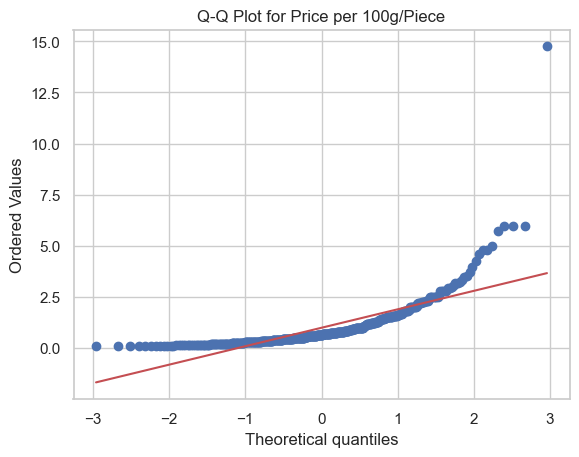

Shapiro-Wilk Test p-value: 1.7746226530525037e-30
The data for 'price per 100g/piece' is not normally distributed
Wilcoxon Test p-value: 0.0011846358443960941
There is a significant difference in price per 100g/piece between Lidl and Aldi (Wilcoxon Test)
Wilcoxon Test p-value: 6.429007785341751e-14
There is a significant difference in price per 100g/piece between Lidl and Migros (Wilcoxon Test)


In [76]:
# Testing for normality -# Step 1: Checking for Normality on the 'price_per_100g_piece' column
# Histogram and density plot


sns.histplot(filtered_df['price per 100g/pice'], kde=True)
plt.title('Distribution of Price per 100g/Piece')
plt.xlabel('Price per 100g/Piece')
plt.show()

# Q-Q Plot to check normality
stats.probplot(filtered_df['price per 100g/pice'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Price per 100g/Piece')
plt.show()

# Shapiro-Wilk Test for normality
stat, p_value = stats.shapiro(filtered_df['price per 100g/pice'])
print(f"Shapiro-Wilk Test p-value: {p_value}")

if p_value > 0.05:
    print("The data for 'price per 100g/piece' is normally distributed")
else:
    print("The data for 'price per 100g/piece' is not normally distributed")

# Step 2: Performing a t-test between two retailers (Lidl and Aldi)
lidl_prices = filtered_df[filtered_df['retailer'] == 'lidl']['price per 100g/pice']
aldi_prices = filtered_df[filtered_df['retailer'] == 'aldi']['price per 100g/pice']
migros_prices = filtered_df[filtered_df['retailer'] == 'migros']['price per 100g/pice']

# Performing the Wilcoxon test between Lidl and Aldi prices
wilcox_stat, wilcox_p_value = mannwhitneyu(lidl_prices, aldi_prices, alternative='less')
print(f"Wilcoxon Test p-value: {wilcox_p_value}")

if wilcox_p_value < 0.05:
    print("There is a significant difference in price per 100g/piece between Lidl and Aldi (Wilcoxon Test)")
else:
    print("There is no significant difference in price per 100g/piece between Lidl and Aldi (Wilcoxon Test)")

# Performing the Wilcoxon test between Lidl and migros prices
wilcox_stat, wilcox_p_value = mannwhitneyu(lidl_prices, migros_prices, alternative='less')
print(f"Wilcoxon Test p-value: {wilcox_p_value}")

if wilcox_p_value < 0.05:
    print("There is a significant difference in price per 100g/piece between Lidl and Migros (Wilcoxon Test)")
else:
    print("There is no significant difference in price per 100g/piece between Lidl and Migros (Wilcoxon Test)")


## how many item do fruit and vegetable sell in the specific categories

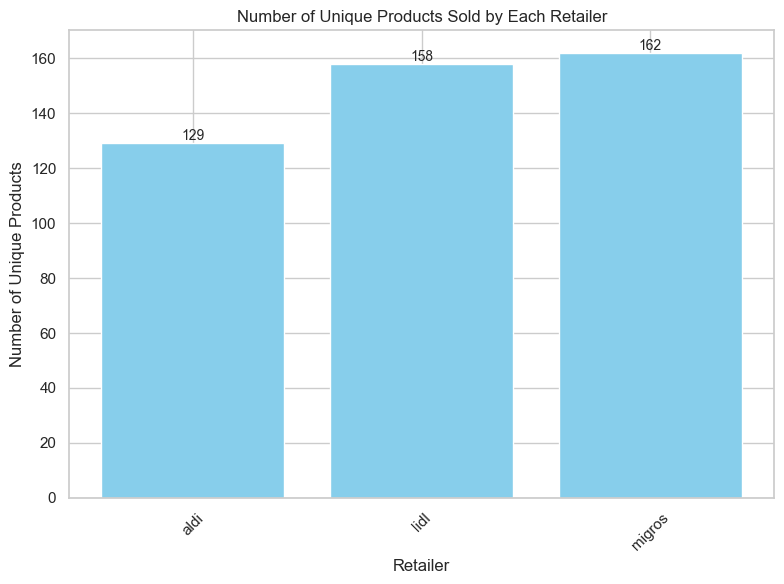

In [82]:
# Count the number of rows for each retailer
# A row is equal to a product
row_counts = filtered_df.groupby("retailer").size().reset_index(name="row_count")

# Rename columns for clarity
row_counts.columns = ["retailer", "unique_product_count"]

# Bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(row_counts["retailer"], row_counts["unique_product_count"], color="skyblue")

# Add the exact count above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height}", ha="center", va="bottom", fontsize=10)

# Labels and title
plt.xlabel("Retailer")
plt.ylabel("Number of Unique Products")
plt.title("Number of Unique Products Sold by Each Retailer")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

This bar chart shows the number of unique products sold by each retailer aldi, lidl and migros.
The y-axis represents the count of unique products, while the x-axis lists the retailers.
Migros and Lidl sell approximately the same number of unique products in the section fruit and vegetable, both reaching 150.
Aldi offers fewer unique products compared to the other two, with a count of 129.
The data of Migros and Lidl was collected on '2024-11-01'.

## are organic products more expensive than non-organic product

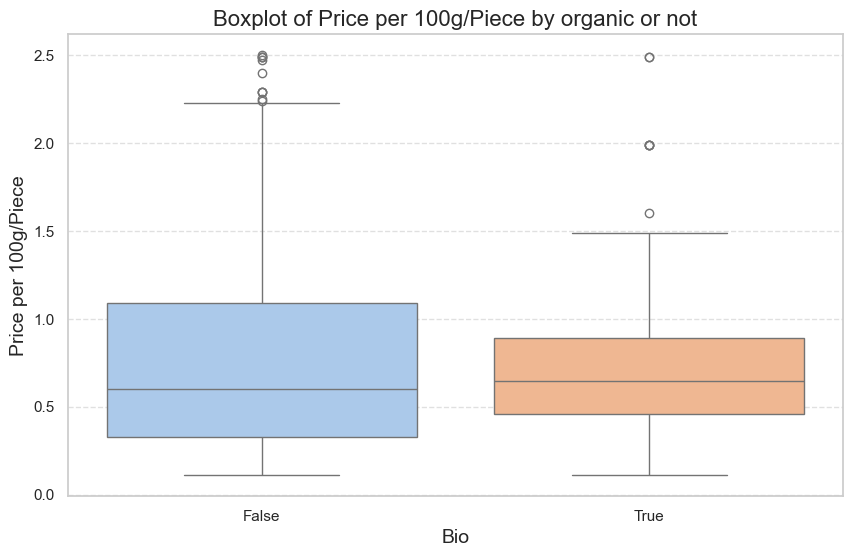

In [92]:
# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the outlier removal function
filtered_df_no_outliers = remove_outliers(filtered_df, 'price per 100g/pice')


plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df_no_outliers, x='BIO', y='price per 100g/pice', palette='pastel')

# Adding title and labels
plt.title('Boxplot of Price per 100g/Piece by organic or not', fontsize=16)
plt.xlabel('Bio', fontsize=14)
plt.ylabel('Price per 100g/Piece', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


Using the IQR method, extreme outliers were removed, and a boxplot was created to compare organic (Bio) and non-organic products. The plot reveals that the median prices for organic and non-organic products are similar, indicating comparable central tendencies between the two groups. However, the price distribution for non-organic products is significantly wider, suggesting greater variability in their prices compared to organic products.

In [93]:
# Step 2: Performing a t-test between two retailers (Lidl and Aldi)
t = filtered_df_no_outliers[filtered_df_no_outliers['BIO'] == True]['price per 100g/pice']
f = filtered_df_no_outliers[filtered_df_no_outliers['BIO'] == False]['price per 100g/pice']

# Performing the Wilcoxon test between Lidl and Aldi prices
wilcox_stat, wilcox_p_value = mannwhitneyu(t, f, alternative='greater')
print(f"Wilcoxon Test p-value: {wilcox_p_value}")

if wilcox_p_value < 0.05:
    print("There is a significant difference in price per 100g/piece between organic (Bio) and non-organic Product")
else:
    print("There is no significant difference in price per 100g/piece between organic (Bio) and non-organic Product")

Wilcoxon Test p-value: 0.0946708667658982
There is no significant difference in price per 100g/piece between organic (Bio) and non-organic Product


## which retailer offers the most expensive and the least expensive products?

<Figure size 1200x600 with 0 Axes>

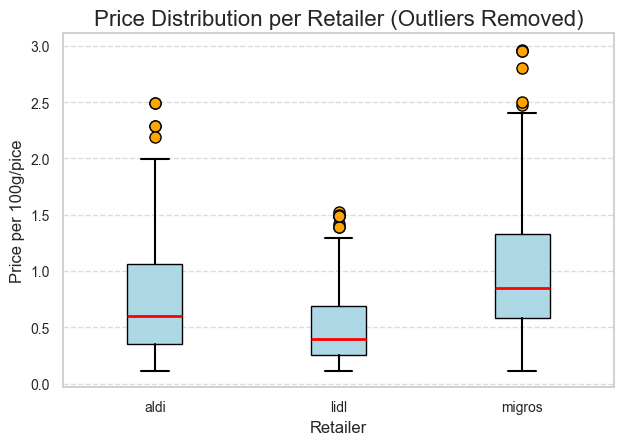

In [78]:
# calculating the iqr method
# to remove extreme outlier more than 1.5 iqr
def remove_outliers(group):
    Q1 = group["price per 100g/pice"].quantile(0.25)
    Q3 = group["price per 100g/pice"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group["price per 100g/pice"] >= lower_bound) & (group["price per 100g/pice"] <= upper_bound)]

# filter outlier per retailer
filtered_df_new = filtered_df.groupby("retailer", group_keys=False).apply(remove_outliers)

# create boxplot
plt.figure(figsize=(12, 6))
filtered_df_new.boxplot(column="price per 100g/pice", by="retailer", grid=False, patch_artist=True,
                    boxprops=dict(facecolor="lightblue", edgecolor="black"),
                    whiskerprops=dict(color="black", linestyle="-", linewidth=1.5),
                    capprops=dict(color="black", linewidth=1.5),
                    medianprops=dict(color="red", linewidth=2),
                    flierprops=dict(marker="o", markerfacecolor="orange", markersize=8))

# additional improvements
plt.title("Price Distribution per Retailer (Outliers Removed)", fontsize=16)
plt.suptitle("")
plt.xlabel("Retailer", fontsize=12)
plt.ylabel("Price per 100g/pice", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()
warnings.filterwarnings("ignore")


The boxplot shows the price distribution per retailer of aldi, lidl and migros with extreme outliers removed.
The red line represents the median price, showing that lidl has the lowest and most consistent prices, while migros has the highest
median and a wide price range. The interquartile range (IQR), represented by the blue boxes is the narrowest for lidl, indicating consistent pricing, while migros and aldi show more variability. Whiskers extend to the non-outlier price range, with migros having the widest spread.Overall the chart highlights lidls stable pricing compared to the broader variability of aldi and migros.

In [96]:
# Step 2: Performing a t-test between two retailers (Lidl and Aldi)
aldi_ttest = filtered_df_new[filtered_df_new['retailer'] == "aldi"]['price per 100g/pice']
lidl_ttest = filtered_df_new[filtered_df_new['retailer'] == "lidl"]['price per 100g/pice']
migros_ttest = filtered_df_new[filtered_df_new["retailer"] == "migros"]["price per 100g/pice"]


# Performing the Wilcoxon test between Lidl and Aldi prices
wilcox_stat, wilcox_p_value = mannwhitneyu(aldi_ttest, lidl_ttest, alternative='two-sided')
print(f"Wilcoxon Test p-value: {wilcox_p_value}")

if wilcox_p_value < 0.05:
    print("There is a significant difference in price per 100g/piece between aldi and lidl")
else:
    print("There is no significant difference in price per 100g/piece between aldi and lidl")

# Performing the Wilcoxon test between Lidl and Aldi prices
wilcox_stat, wilcox_p_value = mannwhitneyu(aldi_ttest, migros_ttest, alternative='two-sided')
print(f"Wilcoxon Test p-value: {wilcox_p_value}")

if wilcox_p_value < 0.05:
    print("There is a significant difference in price per 100g/piece between aldi and migros")
else:
    print("There is no significant difference in price per 100g/piece between aldi and migros")



Wilcoxon Test p-value: 9.087311101004965e-05
There is a significant difference in price per 100g/piece between aldi and lidl
Wilcoxon Test p-value: 0.00015482254957632901
There is a significant difference in price per 100g/piece between aldi and migros


In [ ]:
# price per category and retailer

<Figure size 1000x600 with 0 Axes>

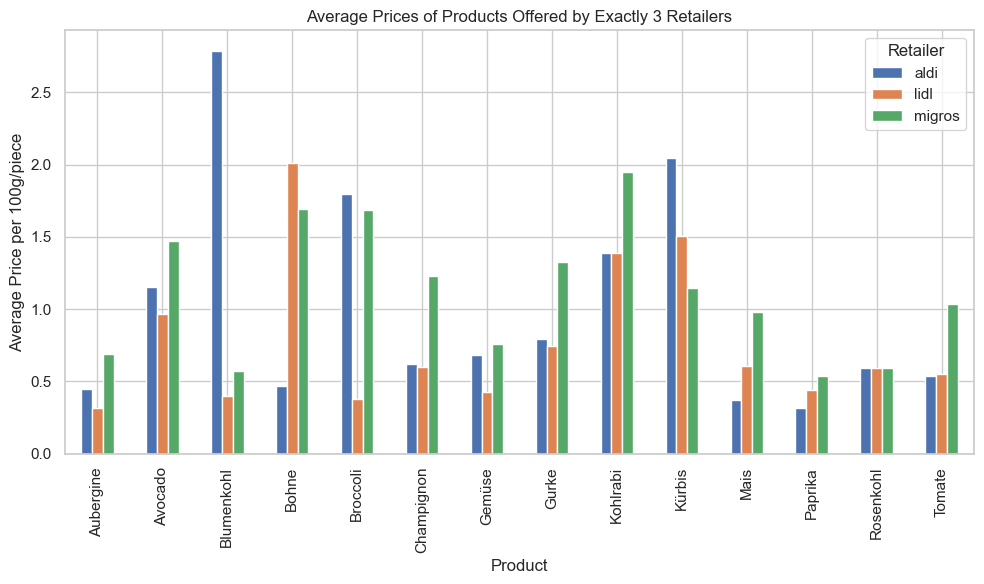

In [81]:
# Calculate the average price per product per retailer
avg_price_per_product = filtered_df.groupby(["retailer", "product_simple"])["price per 100g/pice"].mean().reset_index()

# Count the number of retailers per product
retailer_count = avg_price_per_product.groupby("product_simple")["retailer"].nunique().reset_index(name="retailer_count")

# Filter for products offered by exactly 3 retailers
products_3_retailers = retailer_count[retailer_count["retailer_count"] == 3]
filtered_avg_price_3 = avg_price_per_product[avg_price_per_product["product_simple"].isin(products_3_retailers["product_simple"])]
pivot_table_3 = filtered_avg_price_3.pivot(index="product_simple", columns="retailer", values="price per 100g/pice").fillna(0)

# Plot for products offered by 3 retailers
plt.figure(figsize=(10, 6))
pivot_table_3.plot(kind="bar", figsize=(10, 6))
plt.title("Average Prices of Products Offered by Exactly 3 Retailers")
plt.ylabel("Average Price per 100g/piece")
plt.xlabel("Product")
plt.legend(title="Retailer")
plt.tight_layout()
plt.show()


This bar chart displays the average prices per 100g/pice for products that are offered by all three retailers (Aldi,lidl, migros).
The x-axis represents the productsm while the y-axis shows the average price. Each product has three bars, color-coded by retailer: blue for
aldi, orange for lidl and green for migros.

Prices vary significantly between retailers for certain products. For example, Aldi has a noticeably higher average price for Blumenkohl (cauliflower) compared to Lidl and Migros. For Tomatoes, Aldi and Lidl are much cheaper than Migros. In contrast, prices for Rosenkohl (Brussels sprouts) are fairly consistent across all three retailers.

Migros generally tends to be pricier than Aldi and Lidl for several products, including Gurke (cucumber), Kohlrabi, Champignon (mushroom), and Avocado. One notable bargain is Broccoli, which is significantly cheaper at Lidl compared to the other two retailers, showing a considerable price gap.

## what does the product range of each of the three retailers look like in the defined category?

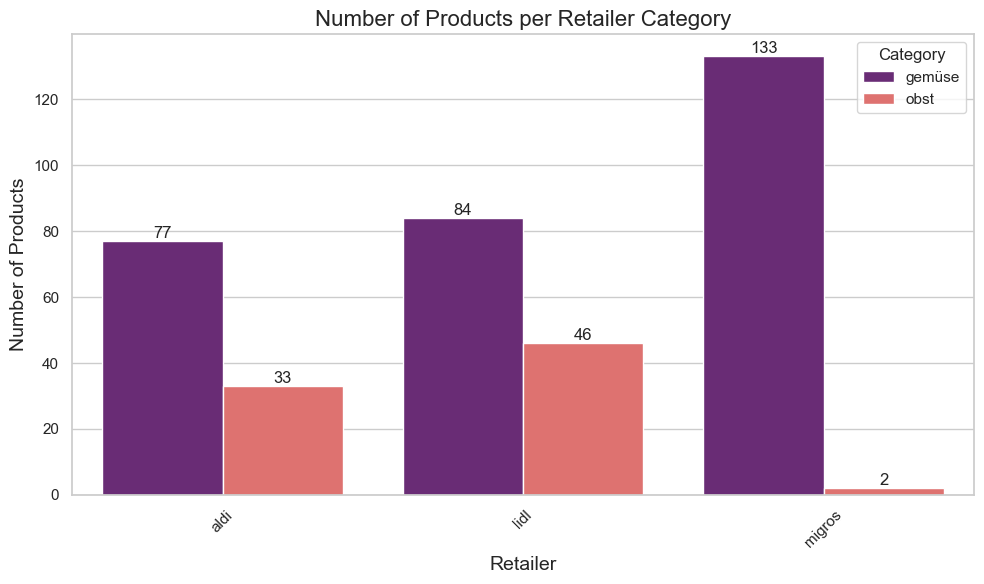

In [65]:
# Group by retailer and Main Category
retailer_counts = filtered_df.groupby(['retailer', 'main_category'])['name'].count().reset_index()

# Style
sns.set_theme(style="whitegrid")

# new barplot adding values
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=retailer_counts, x='retailer', y='name', hue='main_category', palette='magma')

# title and axis
plt.title('Number of Products per Retailer Category', fontsize=16)
plt.xlabel('Retailer', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)

# count over barplot
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12)

# layout adapt
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

This bar chart illustrates the number of products offered by each retailer (aldi, lidl and migros)
in two categories: gemüse (vegetables) and obst (fruits)
Each retailer is represented along the x-axis, with separate bars for the two categories and the y-axis shows the total number of products.
Migros dominates the gemüse category with 133 products, far exceeding the counts for aldi and lidl. In this dataset of migros offers only 2
products in the obst category, the lowest among the three retailers.
Lidl offers a relatively balanced mix, with 84 products in gemüse and 46 in obst.
Aldi has 77 products in the gemüse category and 33 in obst, maintaining a similar balance to Lidl but with fewer overall products.

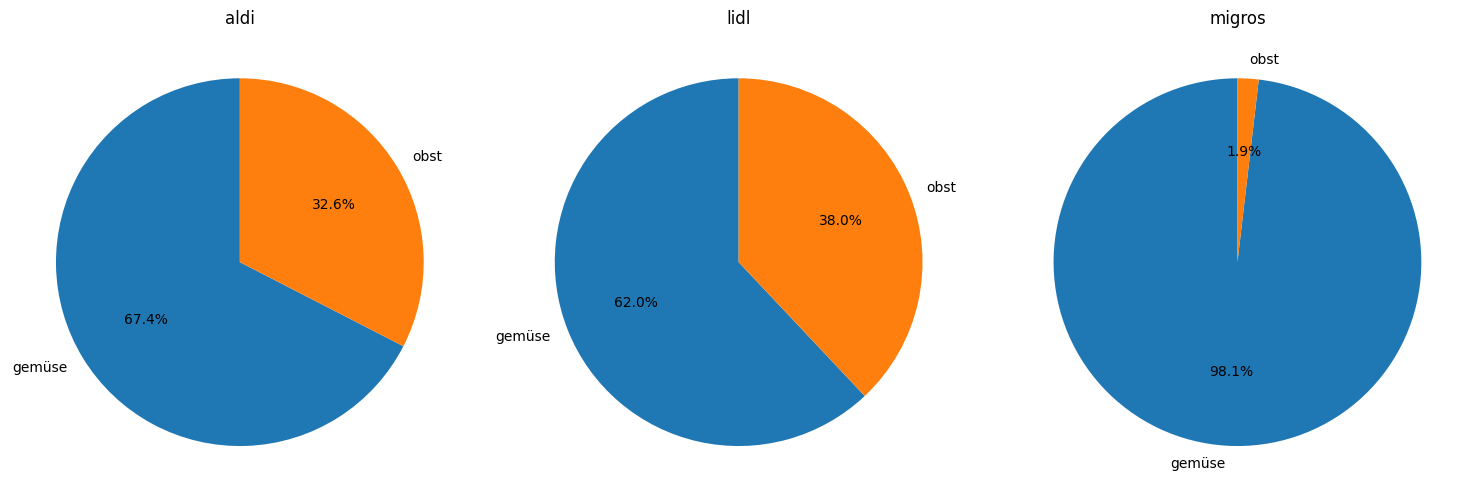

In [43]:
category_counts = filtered_df.groupby(["retailer", "main_category"]).size().reset_index(name = "count")

#unique retailers
retailers = category_counts["retailer"].unique()

#create subplot
fig, axes = plt.subplots(1, len(retailers), figsize=(15,5))

# iterate through retailer an create plot
for i, retailer in enumerate(retailers):
    # filter for the data of the retailer
    retailer_data = category_counts[category_counts["retailer"] == retailer]

    # set the data and labels for the piechart
    values = retailer_data["count"]
    labels = retailer_data["main_category"]

    # create the subplot within the subplot
    axes[i].pie(values, labels=labels, autopct="%1.1f%%", startangle=90)
    axes[i].set_title(f"{retailer}")

# show the plot
plt.tight_layout()
plt.show()


This image shows three pie charts representing the percentage distribution of product categories 'gemüse'(vegtable) and 'obst' for
three retailers Aldi , Lidl and Migros.
The majority of products of aldi belong to gemüse (vegetable) 67.4% while obst(fruits) accounts for 32.6%
Lidl is similar to the distribution as lidl. They also offer 62% gemüse and 38 % obst.
gemüse overwhelmingly dominates at 98.1%, with only a small proportion (1.9%) of obst.


# barplot of variety of the products

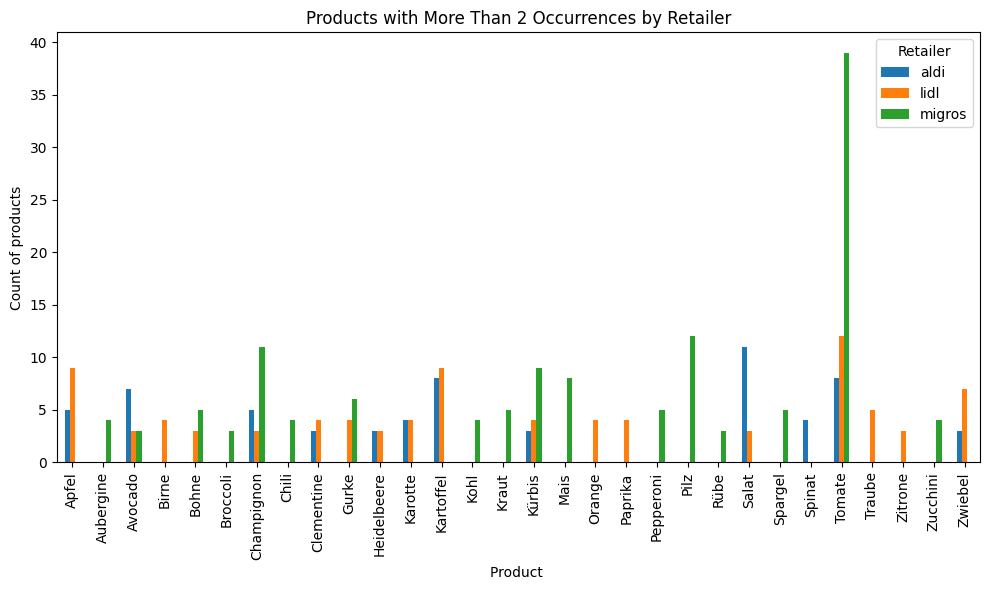

In [45]:
product_count = filtered_df.groupby(["retailer", "product_simple"]).size().reset_index(name = "count")

filtered_products = product_count[product_count["count"] > 2]

pivot_table = filtered_products.pivot(index="product_simple", columns = "retailer", values = "count").fillna(0)

pivot_table.plot(kind="bar", figsize=(10, 6))
plt.title("Products with More Than 2 Occurrences by Retailer")
plt.ylabel("Count of products")
plt.xlabel("Product ")
plt.legend(title="Retailer")
plt.tight_layout()
plt.show()

This bar chart visualizes the count of unique products y-axis with more than two occurences for each retailer (Aldi, Lidl and Migros)
across various product categories x-axis.Each product is represented by three bars, one for each retailer.

Tomaten are the most frequently occuring product across all retailers, with Migros having the highest count, significantly exceeding the
counts for Aldi and Lidl.
Migros generally offers more unique products than Aldi and Lidl in most categories such as Champignon, Broccoli or Kartoffel.
Lidl has noticeable contributions in categories like Traube and Zitrone but overall fewer counts compared to Migros.
Aldi shows consistent but lower product counts compared to Migros, with stronger contributions in category like Apfel.